In [1]:
import tensorflow as tf
print("Is TPU available?", "TPU" in str(tf.config.list_physical_devices()))
print("TPU device: ",tf.config.list_physical_devices('TPU'))

Is TPU available? False
TPU device:  []


In [4]:
!pip install --upgrade tfds-nightly

In [8]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
dataset,info=tfds.load('oxford_flowers102',with_info=True,as_supervised=True)
print(info)
train_ds,test_ds=dataset['train'],dataset['test']

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

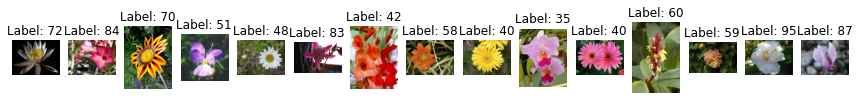

In [14]:
import tensorflow as tf

def plot_images(dataset,n=15):
    plt.figure(figsize=(15,10))
    for i, (image,label) in enumerate(dataset.take(n)):
        plt.subplot(1,n,i+1)
        plt.imshow(image.numpy())
        plt.axis('off')
        plt.title(f"Label: {label.numpy()}")
    plt.show()
    
plot_images(train_ds)

In [11]:
class_counts={}
for _,label in train_ds:
    class_counts[label.numpy()]=class_counts.get(label.numpy(),0)+1
print(class_counts)

{72: 10, 84: 10, 70: 10, 51: 10, 48: 10, 83: 10, 42: 10, 58: 10, 40: 10, 35: 10, 60: 10, 59: 10, 95: 10, 87: 10, 23: 10, 91: 10, 75: 10, 79: 10, 24: 10, 20: 10, 64: 10, 89: 10, 100: 10, 62: 10, 16: 10, 2: 10, 41: 10, 26: 10, 45: 10, 67: 10, 1: 10, 61: 10, 54: 10, 39: 10, 7: 10, 12: 10, 29: 10, 11: 10, 43: 10, 98: 10, 63: 10, 15: 10, 55: 10, 38: 10, 36: 10, 78: 10, 3: 10, 30: 10, 57: 10, 73: 10, 25: 10, 5: 10, 53: 10, 90: 10, 0: 10, 92: 10, 9: 10, 68: 10, 8: 10, 28: 10, 50: 10, 22: 10, 96: 10, 31: 10, 47: 10, 69: 10, 34: 10, 52: 10, 21: 10, 81: 10, 49: 10, 46: 10, 65: 10, 94: 10, 32: 10, 56: 10, 77: 10, 6: 10, 86: 10, 88: 10, 33: 10, 71: 10, 27: 10, 93: 10, 99: 10, 17: 10, 80: 10, 18: 10, 66: 10, 14: 10, 101: 10, 44: 10, 74: 10, 4: 10, 85: 10, 82: 10, 10: 10, 13: 10, 37: 10, 76: 10, 19: 10, 97: 10}


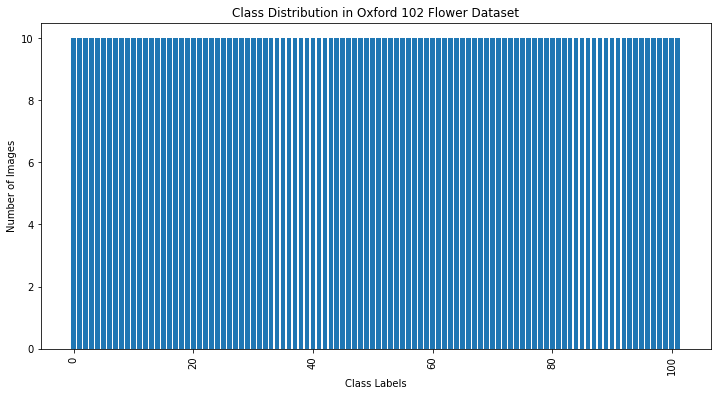

In [13]:
plt.figure(figsize=(12,6))
plt.bar(class_counts.keys(),class_counts.values())
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Oxford 102 Flower Dataset")
plt.xticks(rotation=90)
plt.show()

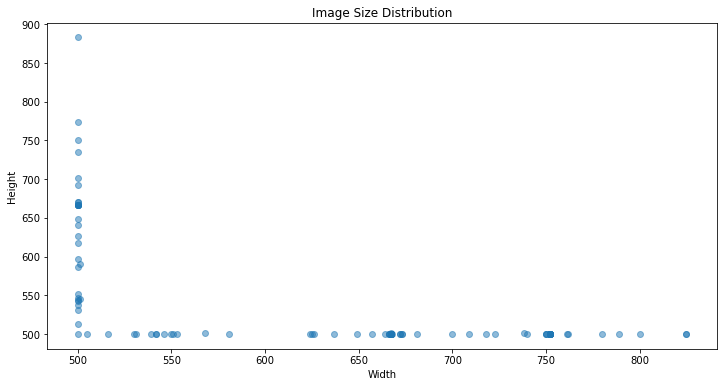

In [22]:
image_sizes=[]
for image,_ in train_ds.take(100):
    image_sizes.append(image.shape)
    
height,width=zip(*[(h,w) for h,w,_ in image_sizes])

plt.figure(figsize=(12,6))
plt.scatter(width,height,alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribution")
plt.show()

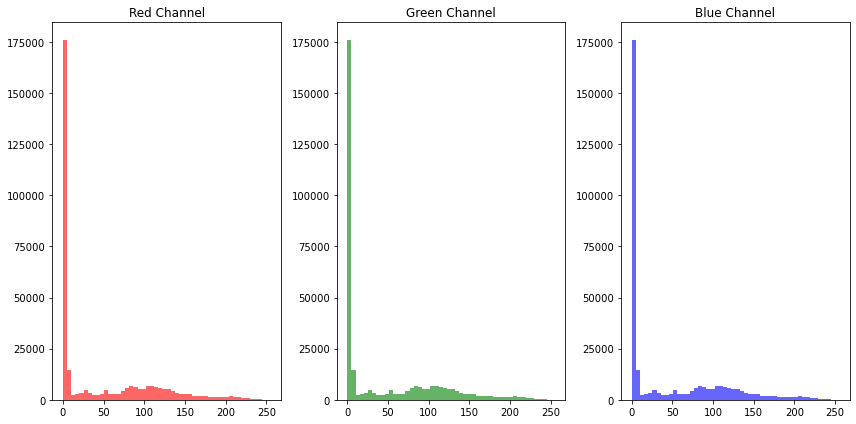

In [27]:
def plot_rgb_distribution(dataset,n=1):
    image,_=next(iter(dataset))
    
    r,g,b=image[...,0],image[...,1],image[...,2]
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    plt.hist(r.numpy().flatten(),bins=50,color="red",alpha=0.6)
    plt.title("Red Channel")
    
    plt.subplot(1,3,2)
    plt.hist(r.numpy().flatten(),bins=50,color="green",alpha=0.6)
    plt.title("Green Channel")
    
    plt.subplot(1,3,3)
    plt.hist(r.numpy().flatten(),bins=50,color="blue",alpha=0.6)
    plt.title("Blue Channel")
    
    plt.tight_layout()
    plt.show()
    
    
plot_rgb_distribution(train_ds)

In [33]:
!pip install tensorflow-addons==0.16.1
import tensorflow as tfa

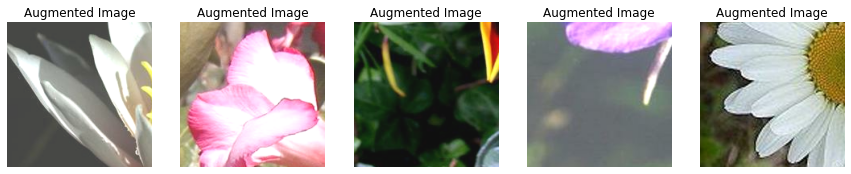

In [34]:
def augment_image(image):
    image=tf.image.random_flip_left_right(image)
    image=tf.image.random_flip_up_down(image)
    image=tf.image.random_crop(image,size=[180,180,3])
    image=tf.image.random_brightness(image,max_delta=0.3)
    return image

def plot_augmented_images(dataset,n=5):
    plt.figure(figsize=(15,10))
    for i,(image, _) in enumerate(dataset.take(n)):
        augmented_image=augment_image(image)
        plt.subplot(1,n,i+1)
        plt.imshow(augmented_image.numpy())
        plt.axis('off')
        plt.title("Augmented Image")
    plt.show()
    
plot_augmented_images(train_ds)